In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score

## Read Data

In [3]:
data_name = "dummy"
# data_name = "dummy_object"
df = pd.read_csv(f"../datasets/data_{data_name}.csv")
# df = pd.read_csv(f"../datasets/train_transformed.csv")
df_copy = df.copy()
df_copy.head()

,Age,Flight Distance,Seat comfort,Leg room service,Checkin service,Departure Delay in Minutes,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility,Female,Male,Loyal,Disloyal,Business,Personal,satisfaction
0,13,460,5,3,4,25,13,-7,2,14,0,1,1,0,0,1,0
1,25,235,1,5,1,1,7,-2,0,8,0,1,0,1,1,0,0
2,26,1142,5,3,4,0,25,-24,0,35,1,0,1,0,1,0,1
3,25,562,2,5,1,11,13,-7,-1,16,1,0,1,0,1,0,0
4,61,214,5,4,3,0,7,-2,1,9,0,1,1,0,1,0,1


## Train-Test Splitting

In [4]:
X= df_copy.iloc[:,:-1]
X

,Age,Flight Distance,Seat comfort,Leg room service,Checkin service,Departure Delay in Minutes,Inflight Comfort and Quality,Customer Service Quality,Convenience and Efficiency,Technological Accessibility,Female,Male,Loyal,Disloyal,Business,Personal
0,13,460,5,3,4,25,13,-7,2,14,0,1,1,0,0,1
1,25,235,1,5,1,1,7,-2,0,8,0,1,0,1,1,0
2,26,1142,5,3,4,0,25,-24,0,35,1,0,1,0,1,0
3,25,562,2,5,1,11,13,-7,-1,16,1,0,1,0,1,0
4,61,214,5,4,3,0,7,-2,1,9,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,4,2,4,0,14,-9,1,16,0,1,0,1,1,0
129876,23,646,4,5,5,0,17,-10,0,20,0,1,1,0,1,0
129877,17,828,2,3,5,0,19,-15,-1,22,1,0,1,0,0,1
129878,14,1127,4,2,4,0,25,-22,-1,33,0,1,1,0,1,0


In [5]:
y = df_copy.iloc[:,-1]
y

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129880, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (90916, 16) and test set is :(38964, 16)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.55602933, -0.93183077, -0.33371896, ..., -0.47486601,
        -1.49129864,  1.49129864],
       [-1.41495429,  0.37845464, -1.09145209, ..., -0.47486601,
        -1.49129864,  1.49129864],
       [ 0.50110909, -0.95390295,  0.42401418, ..., -0.47486601,
         0.6705565 , -0.6705565 ],
       ...,
       [-0.15960242, -0.8706306 ,  1.18174732, ..., -0.47486601,
         0.6705565 , -0.6705565 ],
       [-1.6792389 , -0.83952888,  0.42401418, ..., -0.47486601,
        -1.49129864,  1.49129864],
       [-0.35781588, -0.32183572, -1.09145209, ..., -0.47486601,
         0.6705565 , -0.6705565 ]])

## Set paramiter CV

In [8]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.479662 วินาที


In [10]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 86.19 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     21979
           1       0.86      0.82      0.84     16985

    accuracy                           0.86     38964
   macro avg       0.86      0.86      0.86     38964
weighted avg       0.86      0.86      0.86     38964



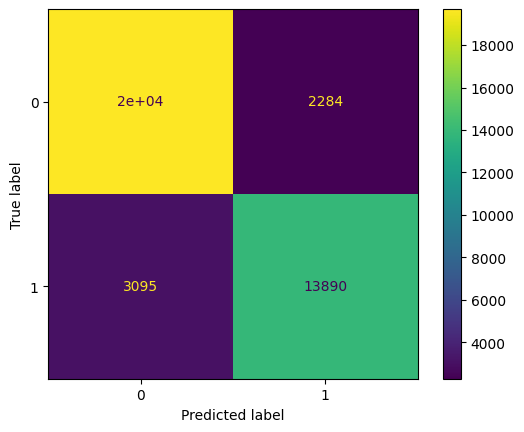

In [11]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

In [12]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_LR = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_LR:.6f} วินาที")

Cross Validation Scores (Logistic Regression): [0.85978225 0.85777924 0.85662432 0.86503877 0.86734862 0.85365451
 0.85810922 0.86734862 0.86949348 0.86190398 0.86124402 0.86008909
 0.86800858 0.86487378 0.8569543 ]
Mean CV Accuracy: 0.8619
Standard Deviation CV Accuracy: 0.0047
เวลาที่ใช้ในการทำ Cross Validation: 8.203102 วินาที


In [13]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8622464692683356
Test Accuracy: 0.8619494918386202


## K-NN(K Nearest Neighbours)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.022506 วินาที


In [15]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 85.85 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     21979
           1       0.87      0.79      0.83     16985

    accuracy                           0.86     38964
   macro avg       0.86      0.85      0.85     38964
weighted avg       0.86      0.86      0.86     38964



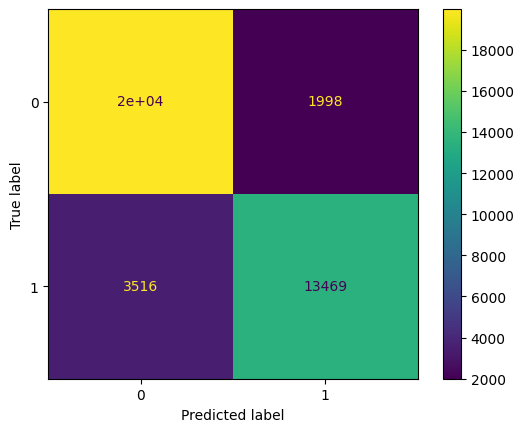

In [16]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_lr.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [17]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.85582316 0.85860419 0.85612935 0.86173899 0.8661937  0.85777924
 0.85480944 0.85744927 0.86470879 0.85513942 0.86190398 0.86206897
 0.86239894 0.86536875 0.85662432]
Mean CV Accuracy: 0.8598
Standard Deviation CV Accuracy: 0.0038
เวลาที่ใช้ในการทำ Cross Validation: 11.281670 วินาที


In [18]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8956729288574068
Test Accuracy: 0.8584847551586079


## Naive-Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train_scaled, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.036095 วินาที


In [20]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test_scaled)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 77.37 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.73      0.78     21979
           1       0.70      0.83      0.76     16985

    accuracy                           0.77     38964
   macro avg       0.78      0.78      0.77     38964
weighted avg       0.78      0.77      0.77     38964



In [21]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_nb = cross_val_score(model_naive, X_train_scaled, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_NB = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_NB:.6f} วินาที")

Cross Validation Scores (Naive Bayes): [0.7791158  0.7737997  0.77049992 0.77033493 0.77709949 0.77148985
 0.77346972 0.77825441 0.78419403 0.7737997  0.78039927 0.77478964
 0.78204917 0.77858439 0.77610955]
Mean CV Accuracy: 0.7763
Standard Deviation CV Accuracy: 0.0040
เวลาที่ใช้ในการทำ Cross Validation: 0.652939 วินาที


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")



เวลาที่ใช้ในการฝึกโมเดล: 0.442237 วินาที


In [23]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 84.46 % .
Classification Report is : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     21979
           1       0.82      0.82      0.82     16985

    accuracy                           0.84     38964
   macro avg       0.84      0.84      0.84     38964
weighted avg       0.84      0.84      0.84     38964



In [24]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")

Cross Validation Scores (Decision Tree): [0.83553283 0.84853984 0.84688995 0.84375516 0.84524006 0.83864049
 0.84721993 0.84227025 0.84491008 0.84210526 0.84210526 0.85810922
 0.8491998  0.84590002 0.84540505]
Mean CV Accuracy: 0.8451
Standard Deviation CV Accuracy: 0.0049
เวลาที่ใช้ในการทำ Cross Validation: 7.077894 วินาที


In [25]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.8445744790062621


## สรูป

In [26]:
print("-"*30,"สรูป","-"*30)

print("-"*65)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")
# print(f"Cross Validation Scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_lr):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_lr):.4f}")

print("-"*65)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")
# print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

print("-"*65)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")
# print(f"Cross Validation Scores (Naive Bayes): {cv_scores_nb}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_nb):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_nb):.4f}")

print("-"*65)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")
# print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")


------------------------------ สรูป ------------------------------
-----------------------------------------------------------------
Accuracy of Logistic Regression is : 86.19 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.479662 วินาที
Mean CV Accuracy: 0.8619
Standard Deviation CV Accuracy: 0.0047
-----------------------------------------------------------------
Accuracy of Knn is : 85.85 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.022506 วินาที
Mean CV Accuracy: 0.8598
Standard Deviation CV Accuracy: 0.0038
-----------------------------------------------------------------
Accuracy of Naive Bayes is : 77.37 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.036095 วินาที
Mean CV Accuracy: 0.7763
Standard Deviation CV Accuracy: 0.0040
-----------------------------------------------------------------
Accuracy of Decision Tree is : 84.46 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.442237 วินาที
Mean CV Accuracy: 0.8451
Standard Deviation CV Accuracy: 0.0049


In [27]:
name = f"สรุป {data_name}".center(65)  # จัดให้ name อยู่ตรงกลางในความกว้าง 65 ตัวอักษร
line = "-" * 65
# Prepare data as a string
results = """
{}
{}
{}
Accuracy of Logistic Regression is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of KNN is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Naive Bayes is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
Accuracy of Decision Tree is : {:.2f} % .
เวลาที่ใช้ในการฝึกโมเดล: {:.6f} วินาที
Mean CV Accuracy: {:.4f}
Standard Deviation CV Accuracy: {:.4f}
-----------------------------------------------------------------
""".format(line, name, line,
    round(accuracy_LR*100, 2), training_time_LR, np.mean(cv_scores_lr), np.std(cv_scores_lr),
    round(accuracy_KNN*100, 2), training_time_KNN, np.mean(cv_scores_knn), np.std(cv_scores_knn),
    round(accuracy_NB*100, 2), training_time_NB, np.mean(cv_scores_nb), np.std(cv_scores_nb),
    round(accuracy_DT*100, 2), training_time_DT, np.mean(cv_scores_dt), np.std(cv_scores_dt)
)

# Write the data to a text file
with open(f'model_performance_{data_name}.txt', mode='w', encoding='utf-8') as file:
    file.write(results)

print("Results have been written to model_performance.txt")


Results have been written to model_performance.txt


 ## FULL Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler_full = StandardScaler()

X = scaler_full.fit_transform(X)
X

array([[-1.74796145, -0.73218446,  1.18142794, ..., -0.47342178,
        -1.49395144,  1.49395144],
       [-0.954274  , -0.95775999, -1.85052014, ...,  2.11228136,
         0.6693658 , -0.6693658 ],
       [-0.88813338, -0.04843998,  1.18142794, ..., -0.47342178,
         0.6693658 , -0.6693658 ],
       ...,
       [-1.48339897, -0.36324316, -1.09253312, ..., -0.47342178,
        -1.49395144,  1.49395144],
       [-1.68182083, -0.06347835,  0.42344092, ..., -0.47342178,
         0.6693658 , -0.6693658 ],
       [ 0.17011655, -0.92868581, -1.09253312, ..., -0.47342178,
        -1.49395144,  1.49395144]])

In [29]:
model_knn_FULL=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn_FULL.fit(X,y)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.033747 วินาที


In [30]:
cv_scores_KNN_FULL = cross_val_score(model_knn_FULL, X, y, cv=k_folds, scoring='accuracy')

print(f"Cross Validation Scores (KNN): {cv_scores_KNN_FULL}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_KNN_FULL):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_KNN_FULL):.4f}")

Cross Validation Scores (KNN): [0.86534242 0.8550641  0.86210879 0.86060746 0.86095392 0.86014551
 0.86499596 0.86268622 0.85910613 0.86130038 0.86636637 0.87040887
 0.85666436 0.86163086 0.86012936]
Mean CV Accuracy: 0.8618
Standard Deviation CV Accuracy: 0.0037
